## Prerequisite

In [1]:
## Import all the necessary Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_columns",30)
pd.set_option("display.max_rows",40)

### https://www.kaggle.com/datasets/mansoordaku/ckdisease/code

In [2]:
## Import dataset

df=pd.read_csv("kidney_disease.csv")

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
## Find out duplicates

df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [10]:
## Handling missing values
### if there any object, We will have to use Mode concep. If it is number, we will have to use mean/medina/simple imputer/knn imputer

In [11]:
## Find the unique values in the each column in the datase

for i in df.columns:
    print()
    print("****************************",i ,"*********************************************************")
    print(set(df[i].tolist()))
    print()


**************************** id *********************************************************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203

In [12]:
df['rc'].mode()

0    5.2
Name: rc, dtype: object

In [13]:
df['pcv'] = df['pcv'].apply(lambda x:'43' if x=='\t43' else x)

In [14]:
df['pcv'].mode()

0    41
1    52
Name: pcv, dtype: object

In [15]:
df['pcv'] = df['pcv'].apply(lambda x:'41' if x=='\t?' else x)

In [16]:
df['wc'] = df['wc'].apply(lambda x:'6200' if x=='\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'8400' if x=='\t8400' else x)

In [17]:
df['wc'].mode()

0    9800
Name: wc, dtype: object

In [18]:
df['rc'].mode()

0    5.2
Name: rc, dtype: object

In [19]:
df['rc'] = df['rc'].apply(lambda x:'5.2' if x=='\t?' else x)

In [20]:
df['wc'] = df['wc'].apply(lambda x:'9800' if x=='\t?' else x)

In [21]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x=='ckd\t' else x)

In [22]:
df['cad'] = df['cad'].apply(lambda x:'no' if x=='\tno' else x)

In [23]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x=='\tyes' else x)

In [24]:
df['dm'] = df['dm'].apply(lambda x:'no' if x=='\tno' else x)

In [25]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x==' yes' else x)

In [26]:
df['pcv'] = df['pcv'].apply(lambda x:'yes' if x==' yes' else x)

In [27]:
## Find the unique values in the each column in the datase

for i in df.columns:
    print()
    print("****************************",i ,"*********************************************************")
    print(set(df[i].tolist()))
    print()


**************************** id *********************************************************
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [29]:
for i in df.select_dtypes(exclude=["object"]).columns:
    print("***",i)

*** id
*** age
*** bp
*** sg
*** al
*** su
*** bgr
*** bu
*** sc
*** sod
*** pot
*** hemo


In [30]:
print(df['pcv'].mode()[0])
print()
print(df['wc'].mode()[0])
print()
print(df['rc'].mode()[0])

41

9800

5.2


In [31]:
## pcv, wc, rc are strings. we need to convert this to numeric values

## First we need to fill the nan/missing value with mode for categorical/object columns which has numerical values

df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['wc'] = df['wc'].fillna(df['wc'].mode()[0])
df['rc'] = df['rc'].fillna(df['rc'].mode()[0])

In [32]:
df['pcv'] = df['pcv'].astype('int64')
df['wc'] = df['wc'].astype('int64')
df['rc'] = df['rc'].astype('float64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [34]:
## We will have to separate object and numerical columns

object_columns = df.select_dtypes(include = ['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include = ['int64','float64']).columns
print("\nNumberical type columns:")
print(numerical_columns)

Object type columns:
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

Numberical type columns:
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [35]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

rbc               38.00
pot               22.00
sod               21.75
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
cad                0.50
htn                0.50
dm                 0.50
ane                0.25
pe                 0.25
appet              0.25
id                 0.00
rc                 0.00
wc                 0.00
pcv                0.00
classification     0.00
dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             400 non-null    int64  
 17  wc              400 non-null    int

In [37]:
### Using simpleimputer method to impute missing data
from sklearn.impute import SimpleImputer
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy = 'median')
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[object_columns]))
df_imp1.columns = df[object_columns].columns
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[numerical_columns]))
df_imp2.columns = df[numerical_columns].columns

In [38]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [39]:
df_imp2.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [40]:
df_imp2 = df_imp2.drop('id', axis=1)

In [41]:
df_imp2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [42]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


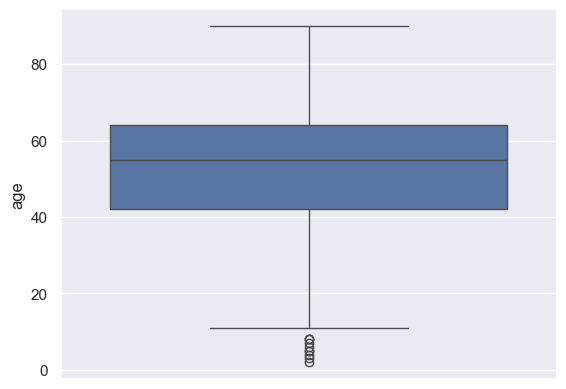

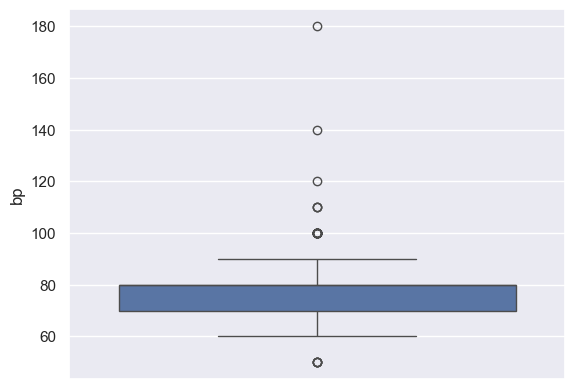

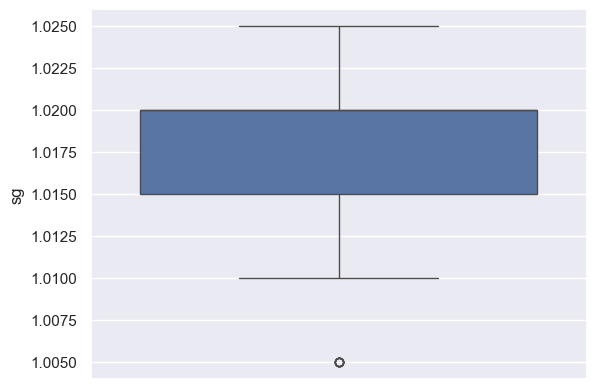

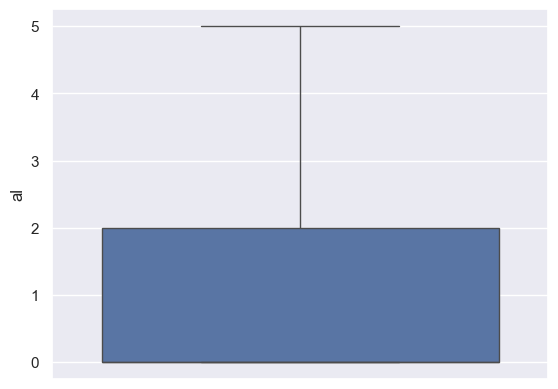

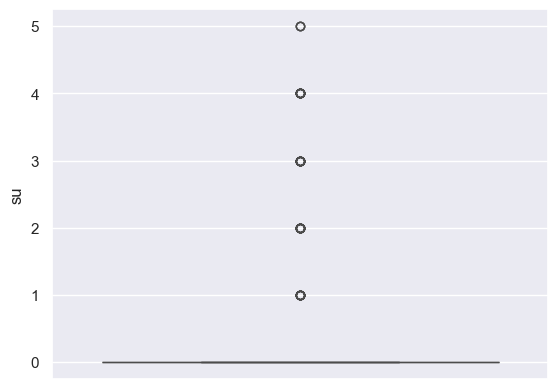

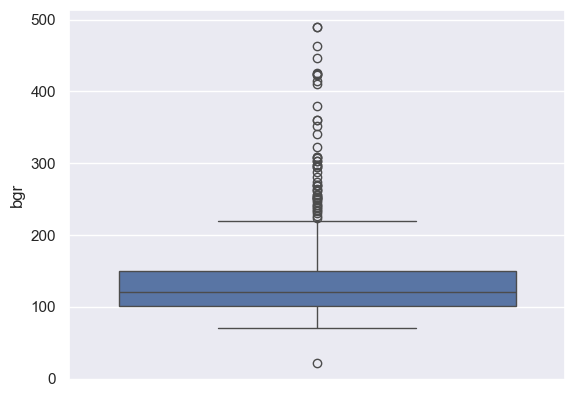

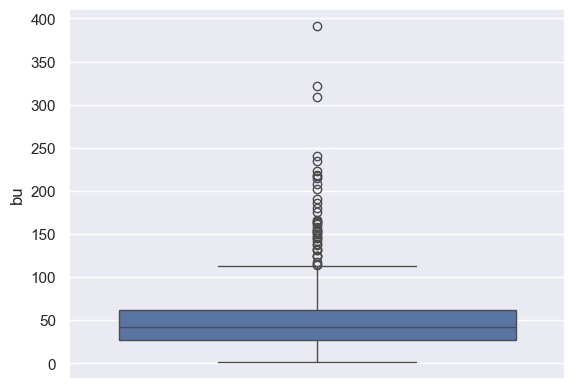

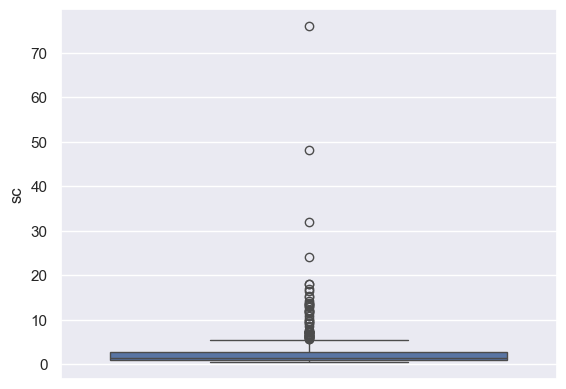

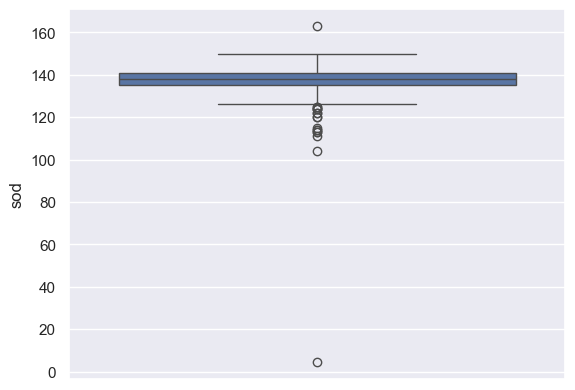

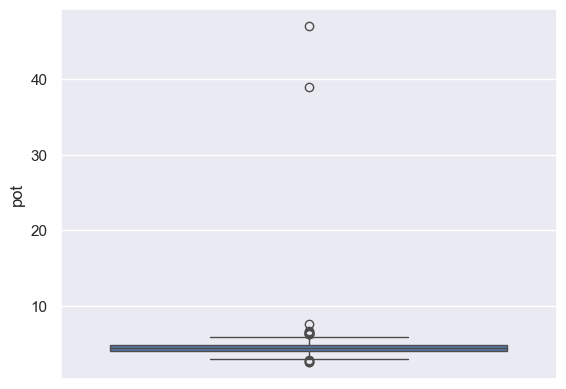

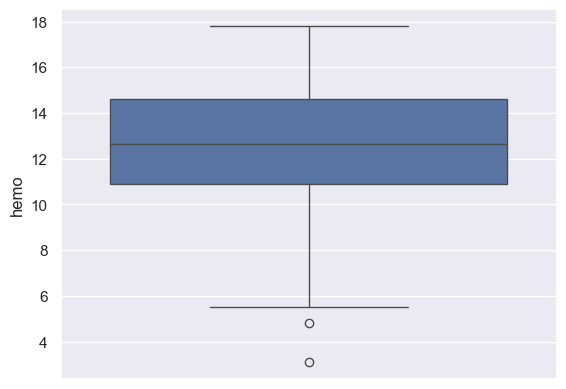

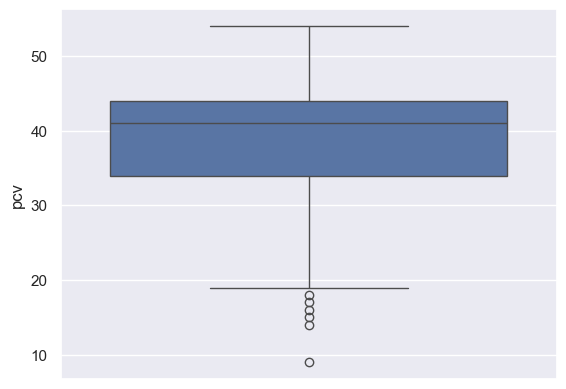

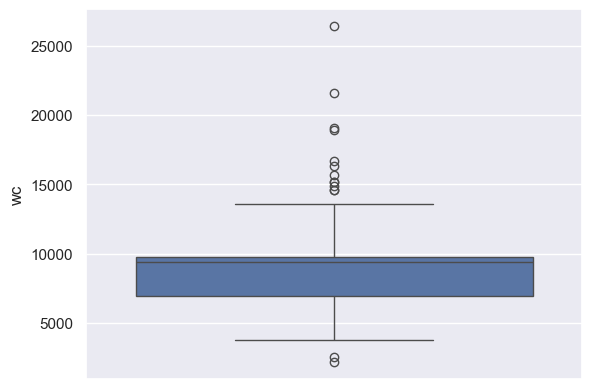

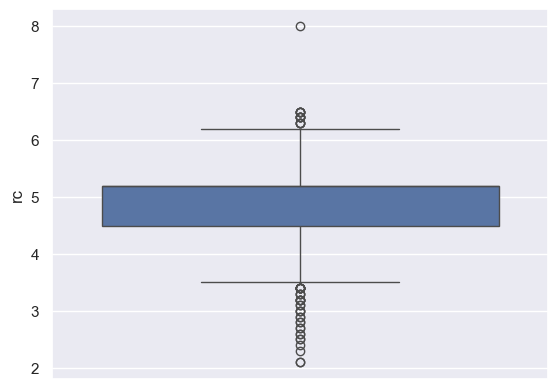

In [43]:
### Checking outlier for numerical columns

def boxplot(col):
    sns.boxplot(df_imp2[col])
    plt.show()
for i in list(df_imp2.select_dtypes(exclude = ['object']).columns):
    boxplot(i)

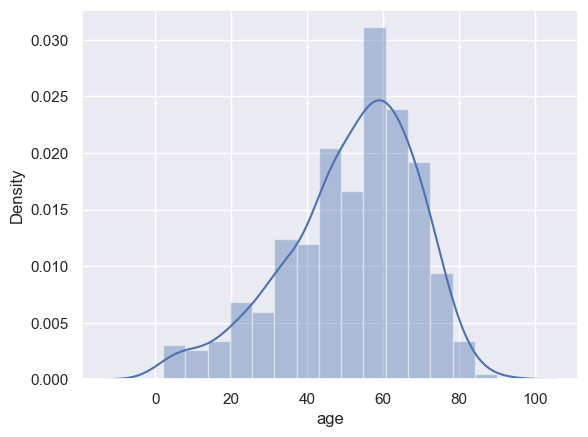

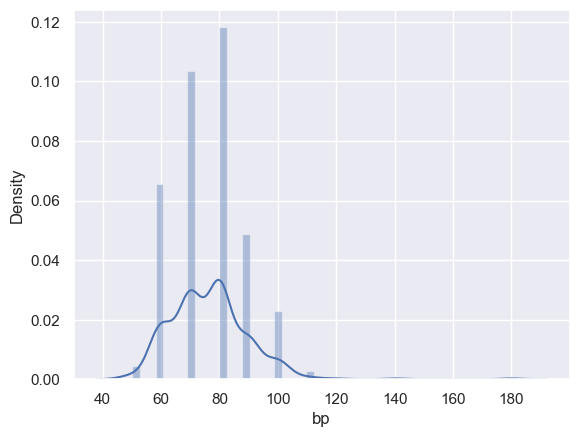

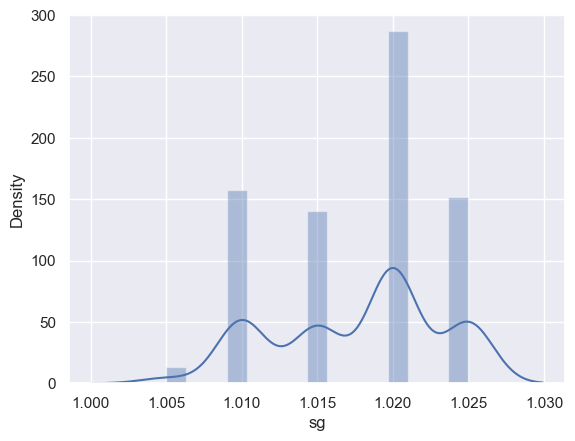

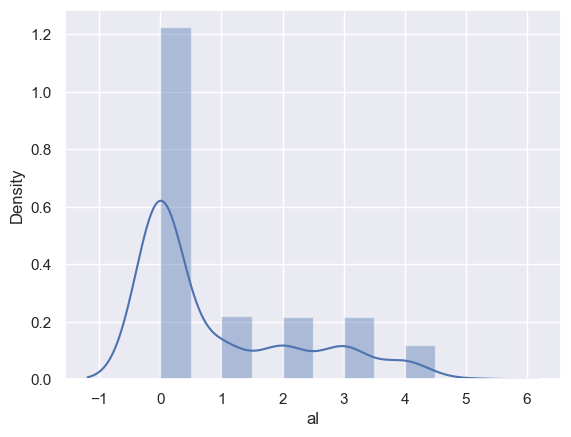

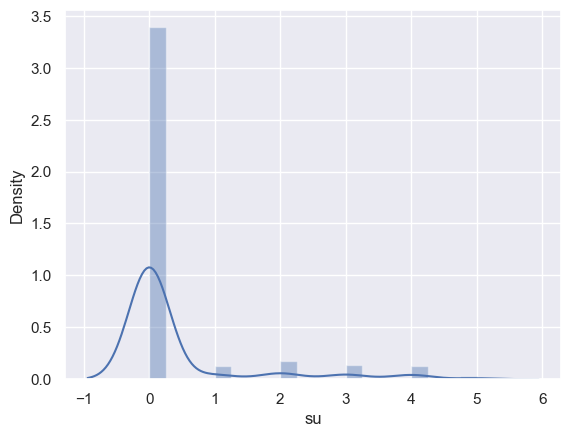

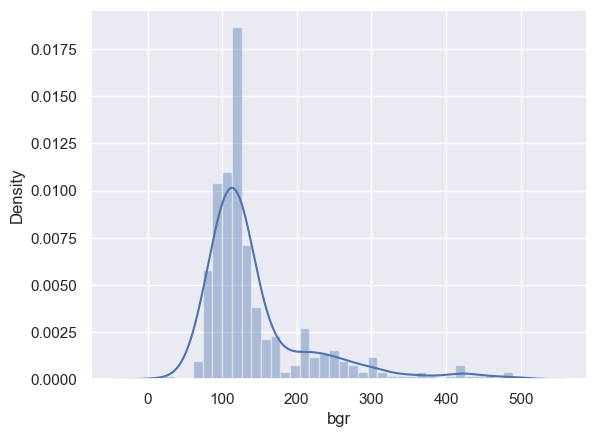

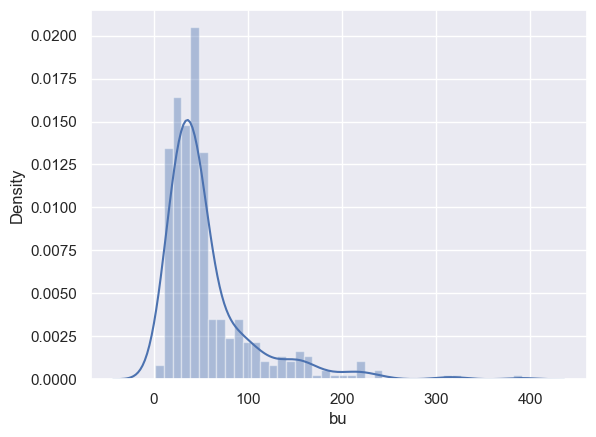

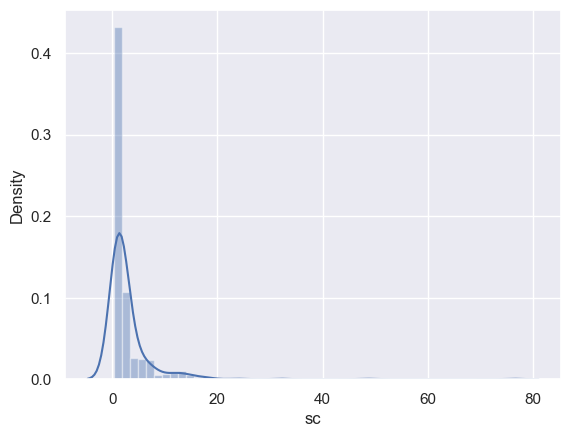

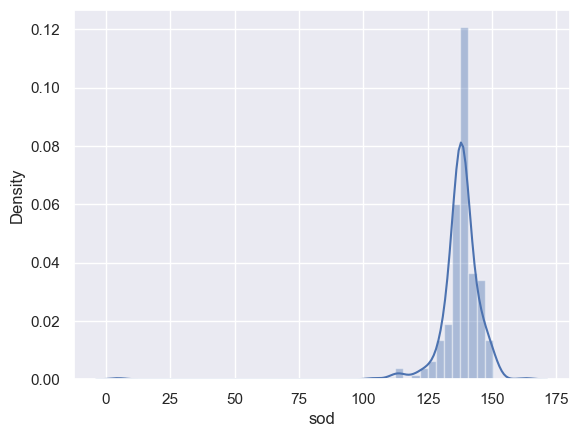

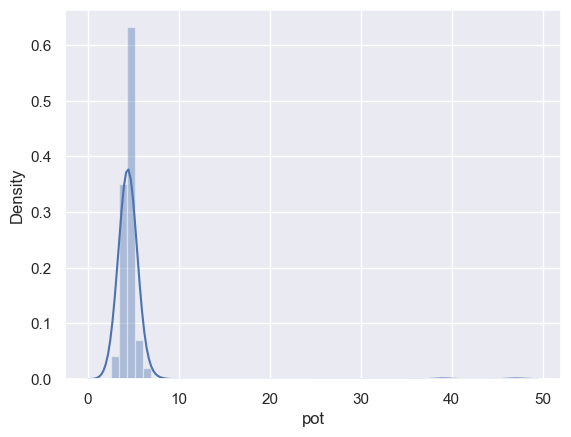

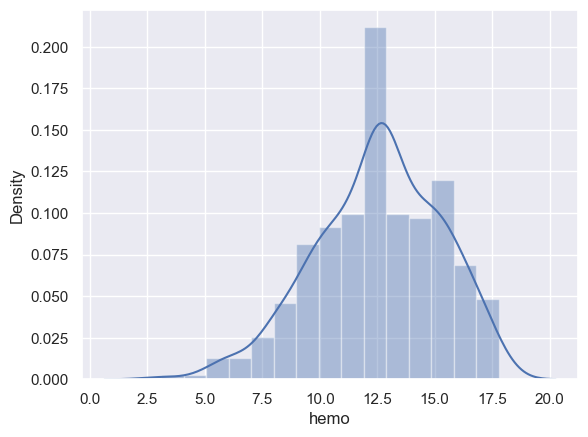

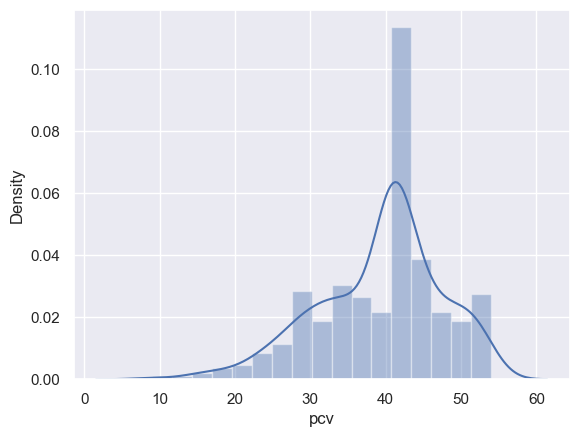

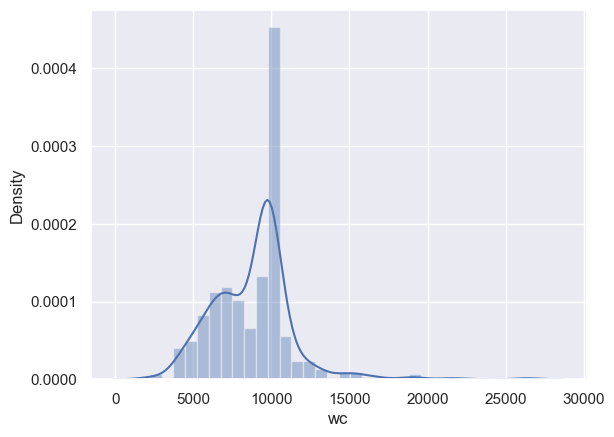

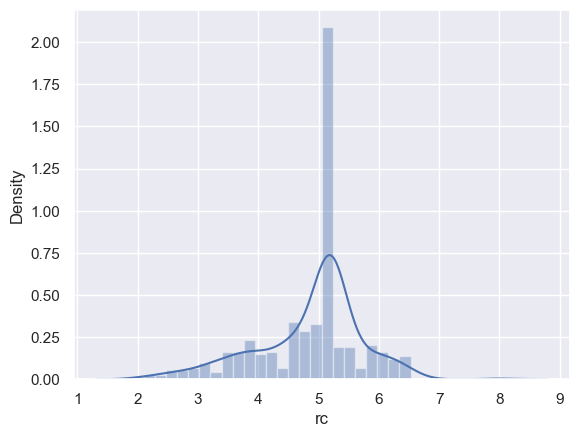

In [44]:
### Checking outlier for numerical columns using distribution plot

def distplot(col):
    sns.distplot(df_imp2[col])
    plt.show()
for i in list(df_imp2.select_dtypes(exclude = ['object']).columns):
    distplot(i)

In [45]:
## let's join the two tables

df_final = pd.concat([df_imp2, df_imp1],axis=1)

In [46]:
df_final.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [47]:
df_final.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [48]:
## split the data to independent and dependent variable 
x = df_final.drop('classification', axis=1)
y = df_final['classification']

In [49]:
x.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [50]:
y.head()

0    ckd
1    ckd
2    ckd
3    ckd
4    ckd
Name: classification, dtype: object

In [51]:
y.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [52]:
y = np.where(y =='ckd', 1, 0)

In [53]:
pd.DataFrame(y).value_counts()

1    250
0    150
Name: count, dtype: int64

In [54]:
pd.DataFrame(y).head()

,0
0,1
1,1
2,1
3,1
4,1


In [55]:
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [56]:
## build a function for classify features and handle encoding

def classify_features(x):
    categorical_features = []
    noncategorical_features = []
    discrete_features = []
    continuous_features = []
    for column in x.columns:
        if x[column].dtype == 'object':
            if x[column].nunique() < 3:
                categorical_features.append(column)
            else:
                noncategorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
            if x[column].nunique() < 100:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, noncategorical_features, discrete_features, continuous_features

In [57]:
categorical, noncategorical, discrete, continuous = classify_features(x)

In [58]:
categorical

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [59]:
noncategorical

[]

In [60]:
discrete

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [61]:
continuous

['bgr', 'bu', 'hemo']

In [62]:
import dtale
dtale.show(x)

In [63]:
### Now find the categorical features and their values

for i in categorical:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
no     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [64]:
x[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [65]:
## Apply encoding technique one hot encoder on categorical columns
df_dummies = pd.get_dummies(x[categorical], drop_first = True, dtype='int')

In [66]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [67]:
df_dummies.shape

(400, 10)

In [68]:
x[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [69]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,1,1,0,0,1,1,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1
3,1,0,1,0,1,0,0,1,1,1
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0
396,1,1,0,0,0,0,0,0,0,0
397,1,1,0,0,0,0,0,0,0,0
398,1,1,0,0,0,0,0,0,0,0


In [70]:
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [71]:
## Drop categrical column from x since we have completed encoding of categorical columns

x = x.drop(x[categorical], axis=1)

In [72]:
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [73]:
## join the encoded categorical featutes into x dataset

x = pd.concat([x,df_dummies], axis=1)

In [74]:
x

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,1,0,0,0,0,0,0,0,0


In [75]:
x.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.260000,8775.500000,4.868750,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.191162,2597.309144,0.871606,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,41.000000,9450.000000,5.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9800.000000,5.200000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [76]:
discrete

['age', 'bp', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'pcv', 'wc', 'rc']

In [77]:
x.isnull().sum()

age            0
bp             0
sg             0
al             0
su             0
bgr            0
bu             0
sc             0
sod            0
pot            0
hemo           0
pcv            0
wc             0
rc             0
rbc_normal     0
pc_normal      0
pcc_present    0
ba_present     0
htn_yes        0
dm_yes         0
cad_yes        0
appet_poor     0
pe_yes         0
ane_yes        0
dtype: int64

In [78]:
continuous

['bgr', 'bu', 'hemo']

<Axes: ylabel='bu'>

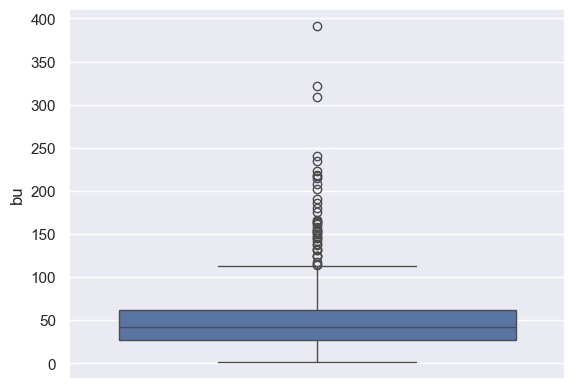

In [79]:
sns.boxplot(y='bu', data=x)

<Axes: ylabel='bgr'>

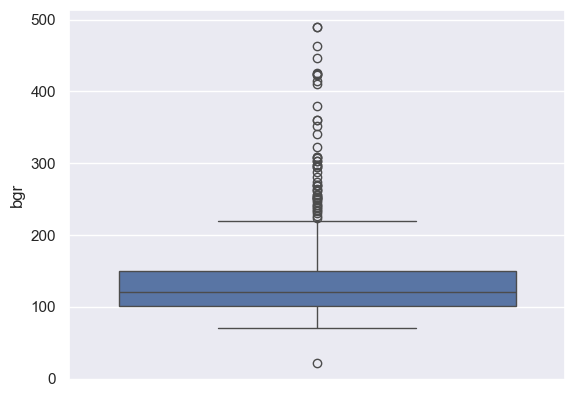

In [80]:
sns.boxplot(y='bgr', data=x)

## Data Preprocessing
* part 1 - missing value treatment done
* part 2 - encoding part done (char variable only)
* part 3 - outlier treatement - not required (numerical variable only)
* part 4 - Feature scaling (normalization or standarization) - depends basis the result
* part 5 - Imbalance treatement (this is only application with classification problem)

In [81]:
pd.DataFrame(y).value_counts(normalize = True)

1    0.625
0    0.375
Name: proportion, dtype: float64

In [82]:
## Split the data into Train and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify=y)

In [83]:
pd.DataFrame(y_train).value_counts(normalize = True)

1    0.625
0    0.375
Name: proportion, dtype: float64

In [84]:
pd.DataFrame(y_test).value_counts(normalize = True)

1    0.625
0    0.375
Name: proportion, dtype: float64

In [85]:
## We will have to convert both x and y to data frame as they are in numpy array
df1 = pd.DataFrame(x)
df2 = pd.DataFrame(y)

## Join the two data frames
cleaned_dataset = pd.concat([df1, df2], axis=1)

In [86]:
df1

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1,1,0,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1,1,0,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1,1,0,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1,1,0,0,0,0,0,0,0,0


In [87]:
## Updating target variable column name
df2.columns = ['Classification']
df2

,Classification
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [88]:
## Export clean data into csv file

cleaned_dataset = pd.concat([df1, df2], axis = 1)
cleaned_dataset.to_csv("cleaned_data.csv")

## Model building - Traditional Machine learning Algorithm

In [89]:
!pip install lightgbm
!pip install catboost

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

## EValuation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [120]:
list_model = []
list_accuracy = []

## LogisticRegression
lgr_model = LogisticRegression()
lgr_model.fit(x_train,y_train)
y_lgr_pred = lgr_model.predict(x_test)
lgr_accuracy = accuracy_score(y_test,y_lgr_pred)
lgr_recall = recall_score(y_test,y_lgr_pred)
lgr_precision = precision_score(y_test,y_lgr_pred)


## DecisionTree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_dt_pred)
dt_accuracy = accuracy_score(y_test,y_dt_pred)
dt_recall = recall_score(y_test,y_dt_pred)
dt_precision = precision_score(y_test,y_dt_pred)


## RadomForest
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_rf_pred)
rf_recall = recall_score(y_test,y_rf_pred)
rf_precision = precision_score(y_test,y_rf_pred)


## AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)
y_ada_pred = ada_model.predict(x_test)
ada_accuracy = accuracy_score(y_test,y_ada_pred)
ada_recall = recall_score(y_test,y_ada_pred)
ada_precision  = precision_score(y_test,y_ada_pred)


## GradientBoost
gd_model = GradientBoostingClassifier()
gd_model.fit(x_train,y_train)
y_gd_pred = gd_model.predict(x_test)
gd_accuracy = accuracy_score(y_test,y_gd_pred)
gd_recall = recall_score(y_test,y_gd_pred)
gd_precision = precision_score(y_test,y_gd_pred)



## XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_xgb_pred = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test,y_xgb_pred)
xgb_recall = recall_score(y_test,y_xgb_pred)
xgb_precision = precision_score(y_test,y_xgb_pred)


## KNN

knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_knn_pred = knn_model.predict(x_test)
knn_accuracy = accuracy_score(y_test,y_knn_pred)
knn_recall = recall_score(y_test,y_knn_pred)
knn_precision = precision_score(y_test,y_knn_pred)


## SVM
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_svm_pred)
svm_recall = recall_score(y_test,y_svm_pred)
svm_precision = precision_score(y_test,y_svm_pred)


## Naive Bayes theorem
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
y_nb_pred = nb_model.predict(x_test)
nb_accuracy = accuracy_score(y_test,y_nb_pred)
nb_recall = recall_score(y_test,y_nb_pred)
nb_precision = precision_score(y_test,y_nb_pred)


## LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train,y_train)
y_lgbm_pred = lgbm_model.predict(x_test)
lgbm_accuracy = accuracy_score(y_test,y_lgbm_pred)
lgbm_recall = recall_score(y_test,y_lgbm_pred)
lgbm_precision = precision_score(y_test,y_lgbm_pred)


## Cat Boost Classifier
cat_model = CatBoostClassifier()
cat_model.fit(x_train,y_train)
y_cat_pred = cat_model.predict(x_test)
cat_accuracy = accuracy_score(y_test,y_cat_pred)
cat_recall = recall_score(y_test,y_cat_pred)
cat_precision = precision_score(y_test,y_cat_pred)



## Voting classifier
evc_model = VotingClassifier(estimators =[('logit',lgr_model), ('dtree',dt_model), ('RF',rf_model), ('AdaBoost',ada_model), ('GrdBoosting',gd_model),
                                          ('XGB',xgb_model),('KNN',knn_model),('SVM',svm_model),('GNB',nb_model),('LightGBM',lgbm_model),('cat',cat_model)])
evc_model.fit(x_train,y_train)
y_evc_pred = evc_model.predict(x_test)
evc_accuracy = accuracy_score(y_test,y_evc_pred)
evc_recall = recall_score(y_test,y_evc_pred)
evc_precision = precision_score(y_test,y_evc_pred)


list_model = ['LogisticRegression','DecisionTree','RandomForest','AdaBoost','GradientBoosting','XGB', 'KNN', 'SVM', 'GNB','LighGBM','CatBoost','Voiting']
list_accuracy = [lgr_accuracy, dt_accuracy, rf_accuracy, ada_accuracy, gd_accuracy, xgb_accuracy, knn_accuracy, svm_accuracy, nb_accuracy, lgbm_accuracy, cat_accuracy, evc_accuracy]
list_recall = [lgr_recall, dt_recall, rf_recall, ada_recall, gd_recall, xgb_recall, knn_recall, svm_recall, nb_recall, lgbm_recall, cat_recall, evc_recall]
list_precision = [lgr_precision, dt_precision, rf_precision, ada_precision, gd_precision, xgb_precision, knn_precision, svm_precision, nb_precision, lgbm_precision, cat_precision, evc_precision]


df_eval = pd.DataFrame({"Model":list_model, "Accuracy": list_accuracy, "recall":list_recall,"Precision":list_precision}).sort_values(by ='Accuracy',ascending=False)
df_eval

[LightGBM] [Info] Number of positive: 200, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 523
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

,Model,Accuracy,recall,Precision
2,RandomForest,1.0000,1.00,1.000000
4,GradientBoosting,1.0000,1.00,1.000000
10,CatBoost,1.0000,1.00,1.000000
11,Voiting,1.0000,1.00,1.000000
3,AdaBoost,0.9875,0.98,1.000000
5,XGB,0.9875,0.98,1.000000
9,LighGBM,0.9875,0.98,1.000000
1,DecisionTree,0.9750,0.98,0.980000
8,GNB,0.9750,0.96,1.000000
0,LogisticRegression,0.8500,0.88,0.880000


In [122]:
print(df_eval)

                 Model  Accuracy  recall  Precision
2         RandomForest    1.0000    1.00   1.000000
4     GradientBoosting    1.0000    1.00   1.000000
10            CatBoost    1.0000    1.00   1.000000
11             Voiting    1.0000    1.00   1.000000
3             AdaBoost    0.9875    0.98   1.000000
5                  XGB    0.9875    0.98   1.000000
9              LighGBM    0.9875    0.98   1.000000
1         DecisionTree    0.9750    0.98   0.980000
8                  GNB    0.9750    0.96   1.000000
0   LogisticRegression    0.8500    0.88   0.880000
7                  SVM    0.7125    0.80   0.754717
6                  KNN    0.7000    0.70   0.795455


<Axes: xlabel='Model', ylabel='Accuracy'>

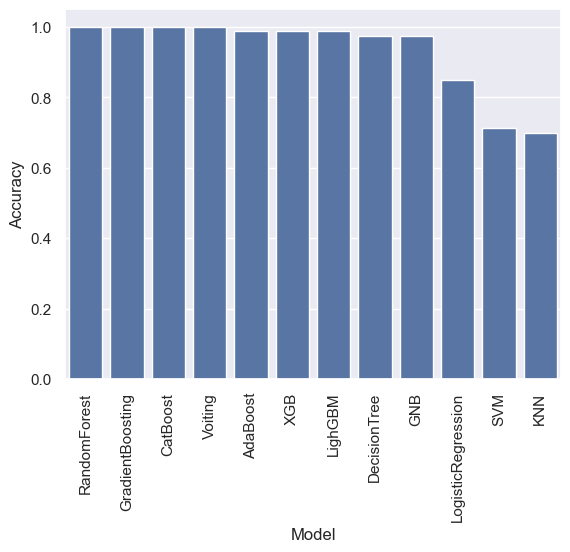

In [121]:
chart = sns.barplot(x="Model", y="Accuracy", data=df_eval)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

### Evaluate Metrics

In [94]:
### Underfitting and overfitting problem - (High bias or High variance) - Bias-variance trade off

y_evc_train_pred = evc_model.predict(x_train)
evc_train_accuracy = accuracy_score(y_train,y_evc_train_pred)
print("Training Accuracy: ",evc_train_accuracy)
y_evc_test_pred = evc_model.predict(x_test)
evc_test_accuracy = accuracy_score(y_test,y_evc_test_pred)
print("Testing Accuracy: ",evc_test_accuracy)

Training Accuracy:  1.0
Testing Accuracy:  1.0


In [95]:
## Cross Validation
from sklearn.model_selection import cross_val_score
training = cross_val_score(evc_model, x_train,y_train, cv=10)

[LightGBM] [Info] Number of positive: 180, number of negative: 108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 498
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.625000 -> initscore=0.510826
[LightGBM] [Info] Start training from score 0.510826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [96]:
print("Training Accuracy: ", training.mean())
print()
print("Testing Accuracy: ", evc_test_accuracy)

Training Accuracy:  0.990625

Testing Accuracy:  1.0


In [97]:
training

array([1.     , 0.9375 , 1.     , 0.96875, 1.     , 1.     , 1.     ,
       1.     , 1.     , 1.     ])

In [98]:
## Create a classfication Report
print("Training Accuracy: ", classification_report(y_train, y_evc_train_pred))
print()
print("Testing Accuracy: ", classification_report(y_test, y_evc_test_pred))

Training Accuracy:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320


Testing Accuracy:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



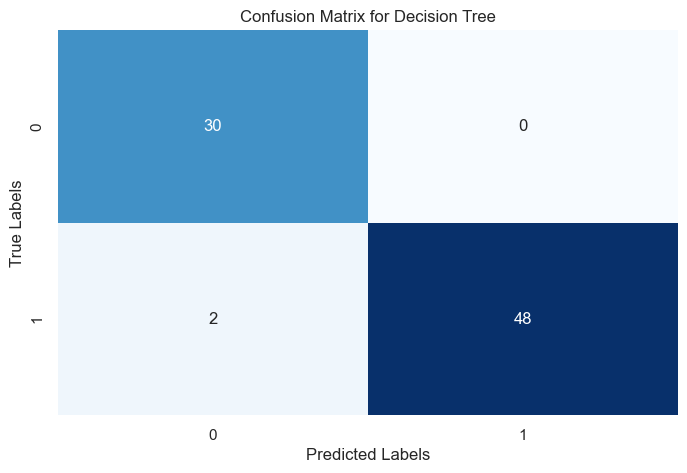

In [99]:
## Create Confusion Matrix

cm_dt = confusion_matrix(y_test,y_dt_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

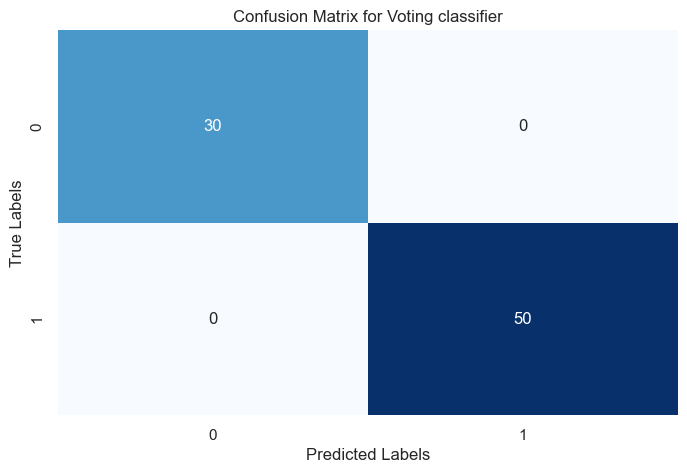

In [100]:
## Create Confusion Matrix

cm_evc = confusion_matrix(y_test,y_evc_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm_evc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Voting classifier')
plt.show()

In [112]:
## If it is required to apply Feature scaling for
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [113]:
x_train_scaled.shape

(320, 24)

## Deep learing Approach

In [103]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

## Description of each line of code

* model = Sequential()

>> Above code used in Keras (a high-level neural networks API in TensorFlow) to create a sequential model, which is a linear stack of layers.

* model.add(Dense(32,input_shape=(24,), activation='relu'))

>> This adds a fully connected (Dense) layer to your Sequential model with:
1. 32 neurons
2. Input shape of (24,)—meaning the input data must be a 1D array (or vector) of length 24
3. ReLU (Rectified Linear Unit) as the activation function, which introduces non-linearity
4. This is typically the first layer of your model, since it defines the input shape. Here's how it fits into a basic model structure:


* model.add(Dense(16, activation='relu'))

>> This adds a second hidden layer with:
1. A Dense layer with 16 neurons
2. Using ReLU activation
3. It automatically connects to the previous layer (32 neurons)

* model.add(Dense(1, activation='sigmoid'))

>> Now we have added an output layer suitable for binary classification:
1. This does the following: Adds a single neuron (for outputting a probability between 0 and 1)
2. Uses the sigmoid activation, which is ideal for binary outcomes


* model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

>> Compiles the model with:
1. Optimizer: 'adam' – an efficient and widely-used optimizer that adapts the learning rate
2. Loss function: 'binary_crossentropy' – ideal for binary classification
3. Metric: 'accuracy' – tracks how often predictions match labels

* model.fit(x_train_scaled,y_train, batch_size=32, epochs=100, validation_data = (x_test_scaled,y_test))

>>Here’s what each parameter does:

x_train_scaled, y_train: Your training data
1. batch_size=32: The model updates weights every 32 samples
2. epochs=100: The model will go through the entire training data 100 times
3. validation_data=(x_test_scaled, y_test): Used to monitor performance on unseen (test) data after each epoch

In [114]:
## Below code used in Keras (a high-level neural networks API in TensorFlow) to create a sequential model, which is a linear stack of layers.
model = Sequential()
model.add(Dense(32,input_shape=(24,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()
callback = EarlyStopping(monitor='val_loss',
                        min_delta=0.0001,
                        patience=20,
                        verbose=1,
                        mode='auto',
                        baseline=None,
                        restore_best_weights=False)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 96 (384.00 B)

In [115]:
history = model.fit(x_train_scaled,y_train, batch_size=32, epochs=100, validation_data = (x_test_scaled,y_test), callbacks =callback)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4375 - loss: 1.1152 - val_accuracy: 0.4250 - val_loss: 1.1453
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5686 - loss: 0.7724 - val_accuracy: 0.5000 - val_loss: 1.0126
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6769 - loss: 0.6647 - val_accuracy: 0.6125 - val_loss: 0.9011
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.4799 - val_accuracy: 0.7000 - val_loss: 0.8102
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4144 - val_accuracy: 0.7750 - val_loss: 0.7353
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.3777 - val_accuracy: 0.8500 - val_loss: 0.6738
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8901 - loss: 0.2940 - val_accuracy: 0.8750 - val_loss: 0.6220
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9150 - loss: 0.2877 - val_accuracy: 0.8875 - v

In [116]:
## Evaludate the model with accuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.3266
Test Accuracy: 0.95


In [118]:
## Evaludate the model with accuracy
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.3266  
Test Accuracy: 0.95


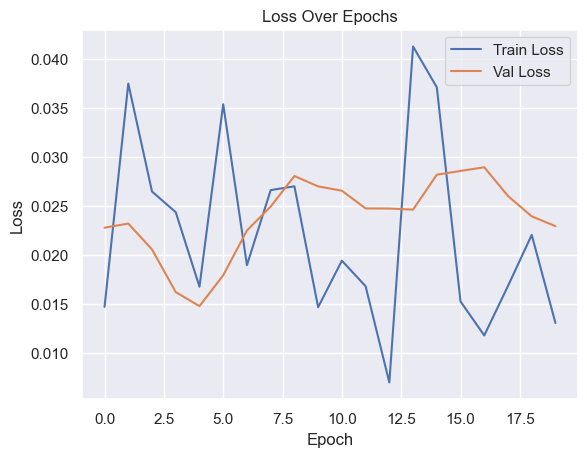

In [110]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

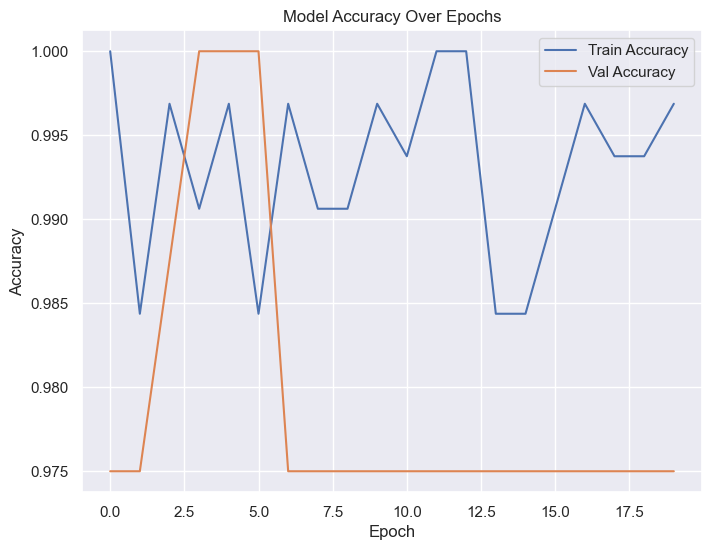

In [111]:
# Plot accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()